In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy
import scipy.signal

# Plot neural traces

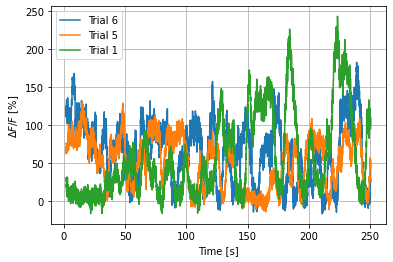

In [10]:
# Load the neural data
neural_data_dir = beh_data_dir = "COBAR_neural.pkl"
neural_df = pd.read_pickle(neural_data_dir)

# Get the number of trials
nb_trials = len(np.unique(neural_df.index.get_level_values("Trial")))

# Get the time data
time = neural_df["t"]

# Get neural data
neuron = neural_df["neuron_100"]

# Trials to plot
trials = np.random.permutation(nb_trials)[:3]

plt.figure()
legend_labels = []
for trial in trials:
    # Get the time data of the trial
    t = time[time.index.get_level_values("Trial") == trial]
    
    # Get the neural data of the trial
    F = neuron[neuron.index.get_level_values("Trial") == trial]
    
    # Sort the intensities
    F_sorted = np.sort(F)
    
    # Calculate the baseline intensity
    q10_index = int(0.1*len(F_sorted))
    F0 = np.mean(F_sorted[:q10_index])
    
    # Calculate flurescence changes and filter
    deltaF_over_F = (F-F0)/F0*100
                 
    plt.plot(t, deltaF_over_F)
    legend_labels.append("Trial " + str(trial))

plt.xlabel("Time [s]")
plt.ylabel("$\Delta F/F$ [%]")
plt.grid()
plt.legend(legend_labels)
plt.show()

# Filtering

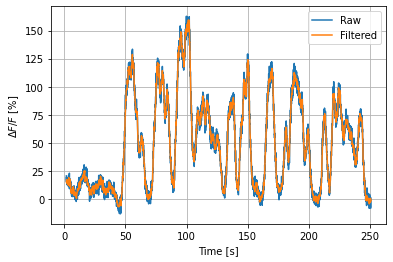

In [11]:
# Get the time data of the trial
t = time[time.index.get_level_values("Trial") == 0]
    
# Get the neural data of the trial
F = neuron[neuron.index.get_level_values("Trial") == 0]
    
# Sort the intensities
F_sorted = np.sort(F)
    
# Calculate the baseline intensity
q10_index = int(0.1*len(F_sorted))
F0 = np.mean(F_sorted[:q10_index])
    
# Calculate flurescence changes and filter
deltaF_over_F = (F-F0)/F0*100
deltaF_over_F_filtered = scipy.signal.medfilt(deltaF_over_F, kernel_size=5)

plt.figure()
plt.plot(t, deltaF_over_F)
plt.plot(t, deltaF_over_F_filtered)
plt.xlabel("Time [s]")
plt.ylabel("$\Delta F/F$ [%]")
plt.grid()
plt.legend(["Raw", "Filtered"])
plt.show()

# Plot the behaviour traces

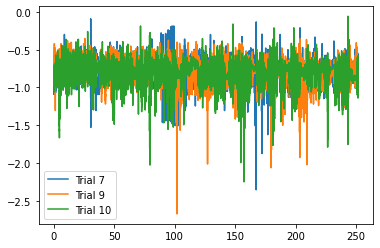

In [12]:
# Load the behavioural data
beh_data_dir = beh_data_dir = "COBAR_behaviour.pkl"
beh_df = pd.read_pickle(beh_data_dir)

# Get the number of trials
nb_trials = len(np.unique(neural_df.index.get_level_values("Trial")))

# Get the time data
time = beh_df["t"]

# Get behavioural data for one angle
angle = beh_df["angle_RF_leg_Tarsus"]

# Trials to plot
trials = np.random.permutation(nb_trials)[:3]

plt.figure()
legend_labels = []
for trial in trials:
    # Get the time data of the trial
    t_trial = time[time.index.get_level_values("Trial") == trial]
    
    angle_trial = angle[angle.index.get_level_values("Trial") == trial]
    
    plt.plot(t_trial, angle_trial)
    legend_labels.append("Trial " + str(trial))
plt.legend(legend_labels)
plt.show()